<h1 style="text-align:center">Deep Learning  Lab Session </h1>
<h1 style="text-align:center">First Lab Session - 1.5 Hour </h1>
<h1 style="text-align:center">Artificial Neural Networks for Handwritten Digits Recognition</h1>

<b> Student 1:</b> # name of student 1  
<b> Student 2:</b> # name of student 2 
 
 
The aim of this session is to practice with Artificial Neural Networks. Answers and experiments should be made by groups of two students. Each group should fill and run appropriate notebook cells. 

Follow instructions step by step until the end and submit your complete notebook as an archive (tar -cf groupXnotebook.tar DL_lab1/).
Do not forget to run all your cells before generating your final report and do not forget to include the names of all participants in the group. The lab session should be completed by March 20th 2019. 

# Introduction

During this lab session, you will implement, train and test a Neural Network
for the Handwritten Digits Recognition problem <a href="http://yann.lecun.com/exdb/mnist/"> [1] </a> with  different settings of hyperparameters. You will use the MNIST dataset which was constructed from scanned documents available from the National Institute of Standards and Technology (NIST). Images of digits were taken from a variety of scanned documents, normalized in size and centered. 


<img src="Nimages/mnist.png" width="350" height="500" align="center">
<center><span>Figure 1: MNIST digits examples</span></center>


This assignment includes a written part of programms to help you understand how to build and train
your neural net and then to test your code and get results. 

1. <a href="NeuralNetwork.py"> NeuralNetwork.py </a> 
2. <a href="transfer_functions.py"> transfer_functions.py </a> 
3.  <a href="utils.py "> utils.py </a> 


Functions defined inside the python files mentionned above can be imported  using the python command "from filename import function".

You will use the following libraries:

1. <a href="http://cs231n.github.io/python-numpy-tutorial/"> numpy </a>: for creating arrays and using methods to manipulate arrays;

2. <a href="http://matplotlib.org/"> matplotlib  </a>: for making plots.

Before starting the lab, please launch the cell below. After that, you may not need to do any imports during the lab.

In [1]:
# All imports
from NeuralNetwork import NeuralNetwork
from transfer_functions import *
from utils import *
import numpy as np
import matplotlib

# Section 1 :  Your First Neural Network

<b>Part 1</b>: Before designing and writing your code, you will first work on a neural network by hand. 
Consider the following neural network with two inputs $x=(x_1,x_2)$, one hidden layer and a single output unit $y$.
The initial weights are set to random values. Neurons 6 and 7 represent biases. Bias values are equal to 1. You will consider a training sample whose feature vector is $x = (0.8, 0.2)$ and whose label is $y = 0.4$.

Assume that neurons have a sigmoid activation function  $f(x)=\frac{1}{(1+e^{-x})}$. The loss function $L$ is a Mean Squared Error (MSE): if $o$ denotes the output of the neural network, then the loss for a given sample $(o, y)$ is $L(o, y) = \left|\left| o - y \right|\right|^2$. In the following, you will assume that if you want to backpropagate the error on a whole batch, you will backpropagate the average error on that batch. More formally, let $((x^{(1)}, y^{(1)}), ..., (x^{(N)}, y^{(N)}))$ be a batch and $o^{(k)}$ the output associated to $x^{(k)}$. Then the total error $\bar{L}$ will be as follows:

<div align="center">$\bar{L} = \frac{1}{N} \sum_{k=1}^{N} L(o^{(k)}, y^{(k)})$.</div>




<img src="Nimages/NN.png" width="700" height="900"> 
<center><span>Figure 2: Neural network </span></center>


<b>Question 1.1.1</b>: Compute the new values of weights $w_{i,j}$ after a forward pass and a backward pass, and the outputs of the neural network before and after the backward path, when the learning rate is $\lambda$=5.
$w_{i,j}$ is the weight of the connexion between neuron $i$ and neuron $j$. Please detail your computations in the cell below and print your answers.

In [2]:
lr = 5.0
x1, x2 = 0.8, 0.2
w1_01, w1_11, w1_21, w1_02, w1_12, w1_22 = 0.2, 0.3, 0.8, -0.4, -0.5, 0.2
w2_01, w2_11, w2_21 = 0.5, -0.6, 0.4
y = 0.4

o1_1 = sigmoid(w1_11*x1+w1_21*x2+w1_01)  # Output of the green neuron
o1_2 =sigmoid(w1_12*x1+w1_22*x2+w1_02) # Output of the red neuron
o2_1 = sigmoid(w2_11*o1_1  +w2_21*o1_2 + w2_01) # Output of the black neuron

print("=== FORWARD PASS 1 ===")
print("o =", o2_1)

# Partial derivatives of the loss wrt weights of the second layer
dL_w2_01 = (o2_1-y)*o2_1*(1-o2_1)
dL_w2_11 =  (o2_1-y)*o2_1*(1-o2_1)*o1_1
dL_w2_21 =  (o2_1-y)*o2_1*(1-o2_1)*o1_2

# Partial derivatives of the loss wrt weights of the first layer
dL_w1_01 = (o2_1-y)*o2_1*(1-o2_1)*w2_11*o1_1*(1-o1_1)
dL_w1_11 = (o2_1-y)*o2_1*(1-o2_1)*w2_11*o1_1*(1-o1_1)*x1
dL_w1_21 = (o2_1-y)*o2_1*(1-o2_1)*w2_11*o1_1*(1-o1_1)*x2
dL_w1_02 = (o2_1-y)*o2_1*(1-o2_1)*w2_21*o1_1*(1-o1_2)
dL_w1_12 = (o2_1-y)*o2_1*(1-o2_1)*w2_21*o1_1*(1-o1_2)*x1
dL_w1_22 = (o2_1-y)*o2_1*(1-o2_1)*w2_21*o1_1*(1-o1_2)*x2

# Weights updates
w1_01 -= lr*dL_w1_01
w1_11 -= lr*dL_w1_11
w1_21 -= lr*dL_w1_21
w1_02 -= lr*dL_w1_02
w1_12 -= lr*dL_w1_12
w1_22 -= lr*dL_w1_22
w2_01 -= lr*dL_w2_01
w2_11 -= lr*dL_w2_11
w2_21 -= lr*dL_w2_21

print("=== BACKWARD PASS ===")
print("w1_01 =", w1_01)
print("w1_11 =", w1_11)
print("w1_21 =", w1_21)
print("w1_02 =", w1_02)
print("w1_12 =", w1_12)
print("w1_22 =", w1_22)
print("w2_01 =", w2_01)
print("w2_11 =", w2_11)
print("w2_21 =", w2_21)

o1_1 = sigmoid(w1_11*x1+w1_21*x2+w1_01)  # Output of the green neuron
o1_2 =sigmoid(w1_12*x1+w1_22*x2+w1_02) # Output of the red neuron
o2_1 = sigmoid(w2_11*o1_1  +w2_21*o1_2 + w2_01) # Output of the black neuron

print("=== FORWARD PASS 2 ===")
print("o =", o2_1)

=== FORWARD PASS 1 ===
o = 0.5597295991095776
=== BACKWARD PASS ===
w1_01 = 0.22701658951346695
w1_11 = 0.3216132716107736
w1_21 = 0.8054033179026935
w1_02 = -0.43463276749414187
w1_12 = -0.5277062139953135
w1_22 = 0.19307344650117164
w2_01 = 0.303187277675964
w2_11 = -0.7270733753139802
w2_21 = 0.3372863608886286
=== FORWARD PASS 2 ===
o = 0.48238447519217936


<b>Part 2</b>: Neural Network Implementation

In Part 1, you computed weight updates for one sample. This is what we do for the stochastic gradient descent algorithm. However in the rest of the lab, you will be to implement the batch version of the gradient descent.

Please read all source files carefully and understand the data structures and all functions.
You are to complete the missing code. 
First you should define the neural network (using the NeuralNetwork class, see in the <a href="NeuralNetwork.py"> NeuralNetwork.py</a> file) and reinitialise weights. 
Then you will need to complete the feedforward() and the backpropagate() functions. 

<b>Question 1.2.1</b>: Implement the feedforward() function.

In [3]:
class NeuralNetwork(NeuralNetwork):
    def feedforward(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 =np.dot(self.input,self.W_input_to_hidden) # Compute activations for the hidden layer
              # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        self.u_hidden = u_1
       
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
       
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden) # Compute output of hidden layer
        
        u_2 = np.dot(self.o_hidden,self.W_hidden_to_output )# Compute activations for the output layer
        self.u_output = u_2
        self.o_output = transfer_f(self.u_output)# Compute output of output layer

<b>Question 1.2.2</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the feedforward() function you implemented gives the same results as the ones you found by hand.

In [4]:
# First define your neural network
model = NeuralNetwork(2,2,2,sigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6,0.2], [0.4,0.3], [0.5,0.4]])
#print(W_input_to_hidden.shape)
#print(W_hidden_to_output)
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
#print(test)
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

Output = [[0.5597296  0.65129244]]


<b>Question 1.2.3</b>: Implement the backpropagate() function.

In [5]:
class NeuralNetwork(NeuralNetwork):
    def backpropagate(self, targets, learning_rate=5.0):
        transfer_df = self.transfer_df
        l = learning_rate
       
        targets = np.array(targets) # Target outputs

        self.dL_du_output =(self.o_output-targets)*transfer_df(self.u_output) # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_hidden = (self.dL_du_output).dot(self.W_hidden_to_output.T[:,:-1])*transfer_df(self.u_hidden)
       
        # Compute partial derivative of loss with respect to weights
        #dW_hidden_to_output = np.dot( self.o_hidden.T,self.dL_du_output)
        #dW_input_to_hidden = np.dot(self.input.T,self.dL_du_hidden.T) 
        dW_input_to_hidden = self.input.T.dot(self.dL_du_hidden)
        dW_hidden_to_output = self.o_hidden.T.dot(self.dL_du_output)        
        
        # Make updates
        self.W_hidden_to_output -= (l/len(targets))*dW_hidden_to_output
        self.W_input_to_hidden -= (l/len(targets))*dW_input_to_hidden

<b>Question 1.2.4</b>: Test your implementation: create the Neural Network defined in Part 1 and see if the backpropagate() function you implemented gives the same weight updates as the ones you found by hand. Do another forward pass and see if the new output is the same as the one you obtained in Question 1.1.1.

In [6]:
# First define your neural network
model = NeuralNetwork(2,2,2,sigmoid)

# Then initialize the weights according to Figure 2
W_input_to_hidden = np.array([[0.3, -0.5], [0.8, 0.2], [0.2, -0.4]])
W_hidden_to_output = np.array([[-0.6,0.2], [0.4,0.3], [0.5,0.4]])
model.weights_init(W_input_to_hidden, W_hidden_to_output)

# Feed test values
test = [[0.8, 0.2]]
model.feedforward(test)

# Backpropagate
targets = [[0.4,0.6]]
model.backpropagate(targets)

# Print weights
print("W_input_to_hidden =", model.W_input_to_hidden)
print("W_hidden_to_output =", model.W_hidden_to_output)

# Feed test values again
model.feedforward(test)

# Print the output
print("Output =", model.o_output)

W_input_to_hidden = [[ 0.31948117 -0.51670862]
 [ 0.80487029  0.19582285]
 [ 0.22435147 -0.42088577]]
W_hidden_to_output = [[-0.72707338  0.16239356]
 [ 0.33728636  0.28144036]
 [ 0.30318728  0.34175471]]
Output = [[0.48298306 0.63080354]]


Checked your implementations and found that everything was fine? Congratulations! You can move to the next section.

# Section 2: Handwritten Digits Recognition

The MNIST dataset consists of handwritten digit images. It is split into a training set containing 60,000 samples and a test set containing 10,000 samples. In this Lab Session, the official training set of 60,000 images is divided into an actual training set of 50,000 samples a validation set of 10,000 samples. All digit images have been size-normalized and centered in a fixed size image of 28 x 28 pixels. Images are stored in byte form: you will use the NumPy python library to convert data files into NumPy arrays that you will use to train your Neural Networks.

You will first work with a small subset of MNIST (1000 samples), then on a very small subset of MNIST (10 samples), and eventually run a model on the whole one.

The MNIST dataset is available in the Data folder.
To get the training, testing and validation data, run the load_data() function.


In [7]:
# Just run that cell ;-)
training_data, validation_data, test_data = load_data()
small_training_data = (training_data[0][:1000], training_data[1][:1000])
small_validation_data = (validation_data[0][:200], validation_data[1][:200])
indices = [1, 3, 5, 7, 2, 0, 13, 15, 17, 4]
vsmall_training_data = ([training_data[0][i] for i in indices], [training_data[1][i] for i in indices])

Loading MNIST data .....
Done.


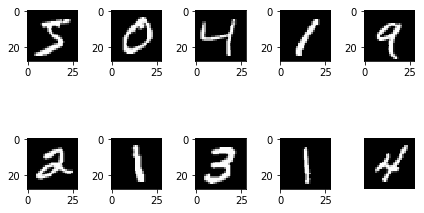

In [8]:
# And you can run that cell if you want to see what the MNIST dataset looks like
ROW = 2
COLUMN = 5
for i in range(ROW * COLUMN):
    # train[i][0] is i-th image data with size 28x28
    image = np.array(training_data[0][i]).reshape(28, 28)   
    plt.subplot(ROW, COLUMN, i+1)          
    plt.imshow(image, cmap='gray')  # cmap='gray' is for black and white picture.
plt.axis('off')  # do not show axis value
plt.tight_layout()   # automatic padding between subplots
plt.show()

<b>Part 1</b>: Build a bigger Neural Network

The input layer of the neural network that you will build contains neurons encoding the values of the input pixels. The training data for the network will consist of many 28 by 28 pixel images of scanned handwritten digits. Thus, the input layer contains 784=28×28 units. The second layer of the network is a hidden layer. We set the number of neurons in the hidden layer to 30. The output layer contains 10 neurons.

<b>Question 2.1.1</b>: Create the network described above using the NeuralNetwork class.

In [9]:
# Define your neural network
mnist_model = NeuralNetwork(28*28,30,10)

<b>Question 2.1.2</b>: Train your Neural Network on the small subset of MNIST (300 iterations) and print the new accuracy on test data. You will use small_validation_data for validation. Try different learning rates (0.1, 1.0, 10.0). You should use the train() function of the NeuralNetwork class to train your network, and the weights_init() function to reinitialize weights between tests. Print the accuracy of each model on test data using the predict() function.

Configuration with 28*28 input layers, 30 hidden layers and 10 output layers
Learning rate = 0.1
Training time: 33.66667032241821
16.4
14.5


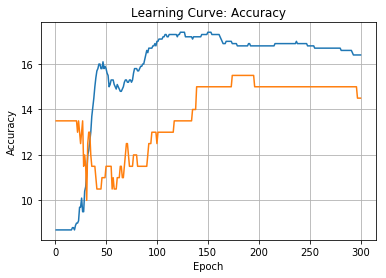

accuracy on test data : 15.96 % 
Learning rate = 1
Training time: 34.00243258476257
68.4
66.5


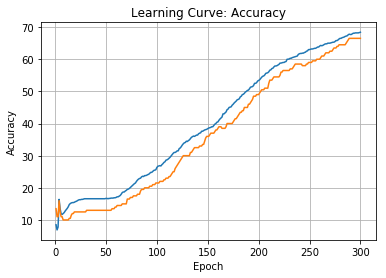

accuracy on test data : 66.87 % 
Learning rate = 10
Training time: 33.93366527557373
44.2
34.0


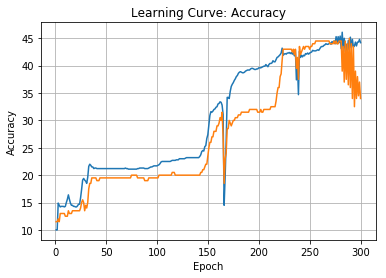

accuracy on test data : 41.82 % 


In [10]:
# Train NN and print accuracy on test data
print("Configuration with 28*28 input layers, 30 hidden layers and 10 output layers")
# Learning rate 0.1
print("Learning rate = 0.1")
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=0.1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))
# Learning rate 1.
print("Learning rate = 1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 10.
print("Learning rate = 10")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=10)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))


<b>Question 2.1.3</b>: Do the same with 15 and 75 hidden neurons.

Configuration with 28*28 input layers, 15 hidden layers and 10 output layers
Learning rate = 0.1
Training time: 31.888697147369385
17.5
15.0


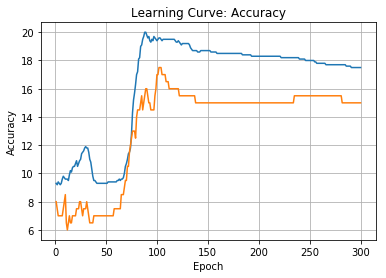

accuracy on test data : 16.74 % 
Learning rate = 1
Training time: 31.988918781280518
48.5
42.0


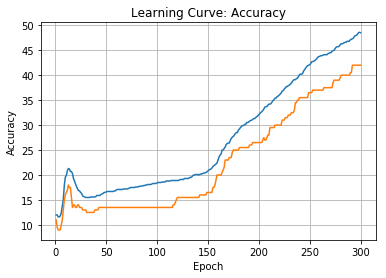

accuracy on test data : 44.95 % 
Learning rate = 10
Training time: 31.221636533737183
11.6
9.0


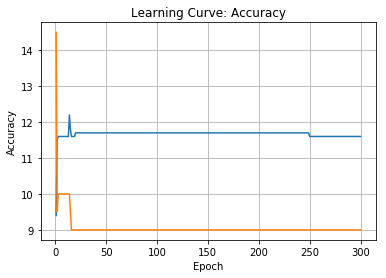

accuracy on test data : 10.33 % 
Configuration with 28*28 input layers, 75 hidden layers and 10 output layers
Learning rate = 0.1
Training time: 39.32269859313965
18.3
14.0


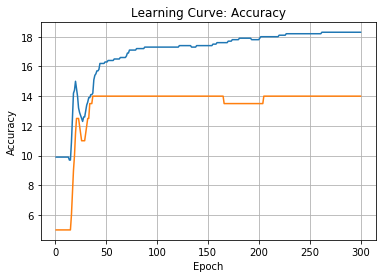

accuracy on test data : 17.60 % 
Learning rate = 1
Training time: 39.20203137397766
81.3
77.5


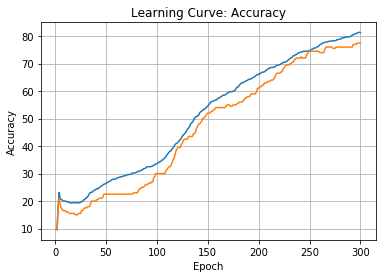

accuracy on test data : 77.22 % 
Learning rate = 10
Training time: 39.83052325248718
97.2
85.0


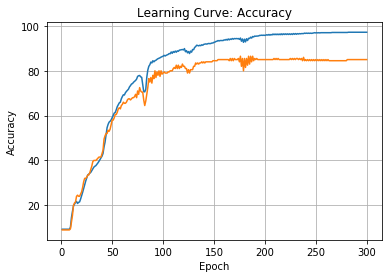

accuracy on test data : 85.13 % 


In [12]:
print("Configuration with 28*28 input layers, 15 hidden layers and 10 output layers")
# Define your neural network
mnist_model = NeuralNetwork(28*28,15,10,sigmoid)
# 15 hidden neurons 
# Learning rate 0.1
print("Learning rate = 0.1")
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=0.1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 1.
print("Learning rate = 1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 10.
print("Learning rate = 10")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=10)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# 75 hidden neurons
print("Configuration with 28*28 input layers, 75 hidden layers and 10 output layers")
mnist_model = NeuralNetwork(28*28,75,10,sigmoid)

# Learning rate 0.1
print("Learning rate = 0.1")
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=0.1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 1.
print("Learning rate = 1")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 10.
print("Learning rate = 10")
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=10)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))


<b>Question 2.1.3</b>: Repeat Questions 2.1.2 and 2.1.3 on the very small datasets. You will use small_validation_data for validation.

Configuration with 28*28 input layers, 30 hidden layers and 10 output layers
Learning rate = 0.1
Training time: 2.7535715103149414
40.0
13.0


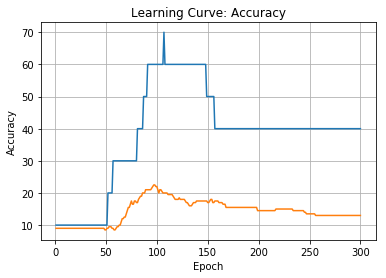

accuracy on test data : 13.60 % 
Learning rate = 1
Training time: 2.7468738555908203
100.0
52.0


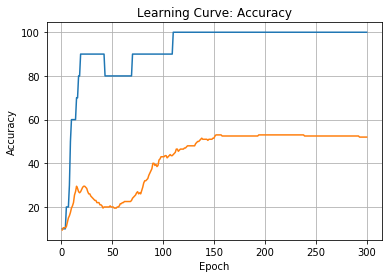

accuracy on test data : 51.22 % 
Learning rate = 10
Training time: 2.757195472717285
30.0
18.0


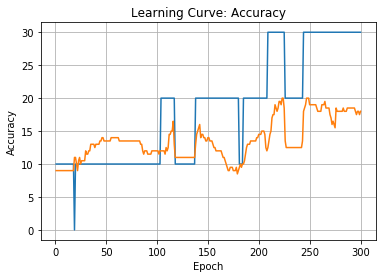

accuracy on test data : 20.89 % 
Configuration with 28*28 input layers, 15 hidden layers and 10 output layers
Learning rate = 0.1
Training time: 2.5950844287872314
40.0
12.5


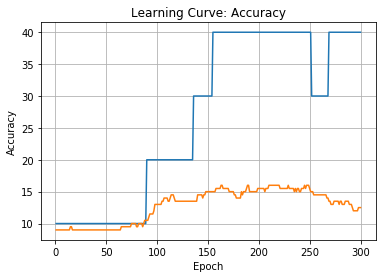

accuracy on test data : 15.25 % 
Learning rate = 1
Training time: 2.6227078437805176
100.0
47.5


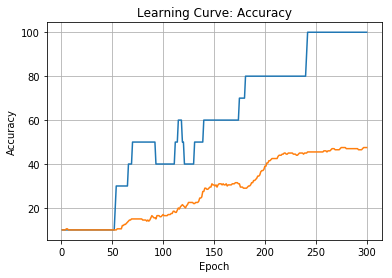

accuracy on test data : 47.28 % 
Learning rate = 10
Training time: 2.597050428390503
10.0
13.0


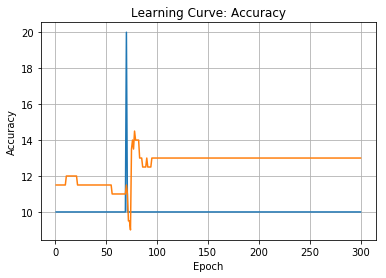

accuracy on test data : 10.86 % 
Configuration with 28*28 input layers, 75 hidden layers and 10 output layers
Learning rate = 0.1
Training time: 3.2720229625701904
90.0
27.0


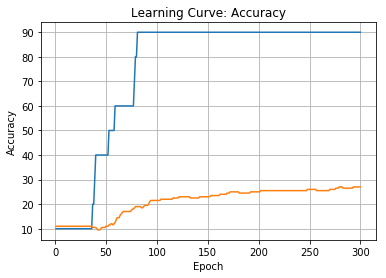

accuracy on test data : 28.47 % 
Learning rate = 1
Training time: 3.322255849838257
100.0
51.0


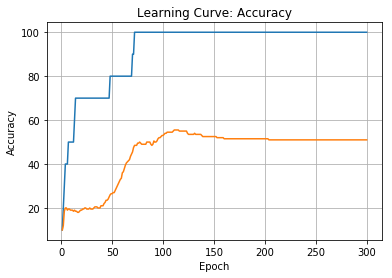

accuracy on test data : 52.25 % 
Learning rate = 10
Training time: 3.3075294494628906
100.0
49.5


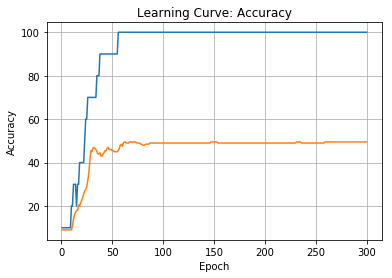

accuracy on test data : 48.50 % 


In [13]:
# Train NN and print accuracy on test data
print("Configuration with 28*28 input layers, 30 hidden layers and 10 output layers")
# 30 hidden neurons
mnist_model = NeuralNetwork(28*28,30,10,sigmoid)

# Learning rate 0.1
print("Learning rate = 0.1")
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=0.1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 1.
print("Learning rate = 1")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 10.
print("Learning rate = 10")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=10)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# 15 hidden neurons
print("Configuration with 28*28 input layers, 15 hidden layers and 10 output layers")
mnist_model = NeuralNetwork(28*28,15,10,sigmoid)

# Learning rate 0.1
print("Learning rate = 0.1")
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=0.1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 1.
print("Learning rate = 1")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 10.
print("Learning rate = 10")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=10)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# 75 hidden neurons
print("Configuration with 28*28 input layers, 75 hidden layers and 10 output layers")
mnist_model = NeuralNetwork(28*28,75,10,sigmoid)

# Learning rate 0.1
print("Learning rate = 0.1")
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=0.1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 1.
print("Learning rate = 1")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

# Learning rate 10.
print("Learning rate = 10")
mnist_model.weights_init()
mnist_model.train(vsmall_training_data,small_validation_data,iterations=300,learning_rate=10)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))


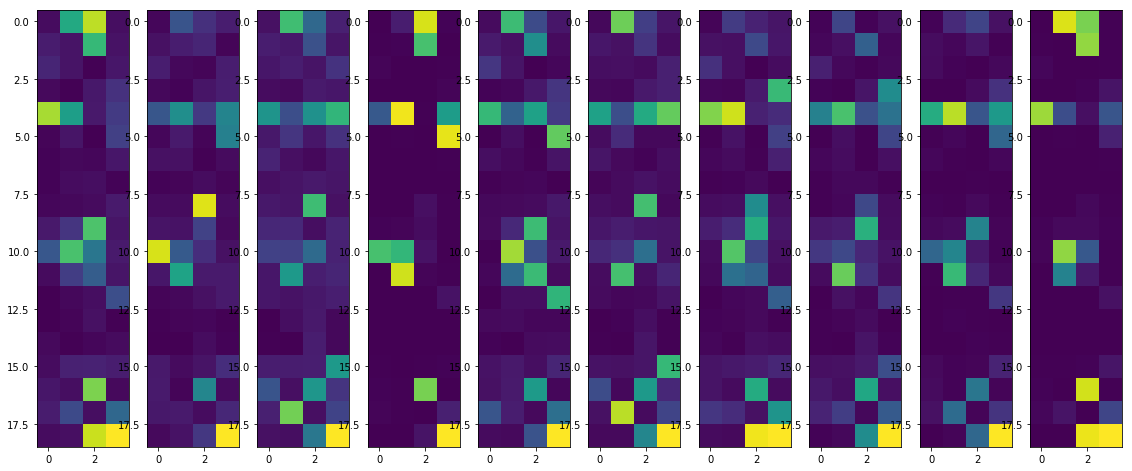

In [14]:
# plt.imshow(mnist_model.o_hidden[2,:].reshape(4,19))
#     image = np.array().reshape(28, 28)   
#     plt.subplot(ROW, COLUMN, i+1)          
#     plt.imshow(image, cmap='gray')
# len(training_data[0][1])
plt.figure(figsize=(150,150))
for i in range(mnist_model.o_hidden[:10].shape[0]):
    im_=mnist_model.o_hidden[i,:].reshape(19,4)
    plt.subplot(mnist_model.o_hidden[:10].shape[0], mnist_model.o_hidden[:10].shape[1], i+1)  
    plt.imshow(im_)

<b>Question 2.1.5</b>: Explain the results you obtained at Questions 2.1.2, 2.1.3 and 2.1.4.

Answer: <br>
For all the questions we increased the number of epochs to 300 in order to have a better view and understanding.<br>
1) For the first question where we train three models using three learning rates (0.1, 1 and 10) with 30 hidden layers, we notice that for 0.1 and 10 and after  300 epochs as the learning rate is too small/big for us to reach an optimum. We either make small steps and keep far from optimality or big steps and miss out on the optimal solution.<br>
For the 10 exerience, we reach convergence after very few steps, that is because the big step doesn't allow us to move otherwise.<br>
2) For the second question, we try both 15 and 75 hidden layers. We notice that for 15 hidden layer, our best accuracy is obtained for a learning rate equal to 10. <br>Meanwhile, we obtain the best accuracy for 75 layer for a learning rate equal to 1 and a very poor accuracy for the others. We can conclude that this is due to the way dataset is repartionned (having fifteen slices of weights to recreate an output is diffrent than seventy five weights and thus requires a diffrent "step" for each case<br>
3) For the third question, we repeat all the three experiments but this time using a smaller dataset. We notice first that the changes between one epoch and another is more stiff. We notice also that the best outcome is reached also for 75 hidden layers and a learning rate of 1. <br>
remark: we notice that for all the different architecture the accuracy on training set is greter than the accuracy on test set,so , we are facing the problem of overfitting.

<b>Question 2.1.6</b>: Among all the numbers of hidden neurons and learning rates you tried in previous questions, which ones would you expect to achieve best performances on the whole dataset? Justify your answer.

Answer: <br>
As for the previous experiment, when we increased the dataset the best outcome was reached for 75 hidden layers and a learning rate equal 1. We can expect to have the same result for the complete dataset.

<b>Question 2.1.7</b>: Train a model with the number of hidden neurons and the learning rate you chose in Question 2.1.6 and print its accuracy on the test set. You will use validation_data for validation. Training can be long on the whole dataset (~40 minutes): we suggest that you work on the optional part while waiting for the training to finish.

Training time: 2670.625196456909
77.956
79.96


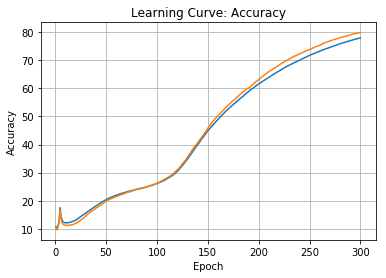

accuracy on test data : 78.98 % 


In [15]:
mnist_model = NeuralNetwork(28*28,75,10)
mnist_model.weights_init()
mnist_model.train(training_data,validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

<b>Part 2 (optional)</b>: Another loss function

In classification problems, we usually replace the sigmoids in the output layer by a "softmax" function and the MSE loss by a "cross-entropy" loss. More formally, let $u = (u_1, ..., u_n)$ be the vector representing the activation of the output layer of a Neural Network. The output of that neural network is $o = (o_1, ..., o_n) = \textrm{softmax}(u)$, and

<div align="center">$\textrm{softmax}(u) = (\frac{e^{u_1}}{\sum_{k=1}^n e^{u_k}}, ..., \frac{e^{u_n}}{\sum_{k=1}^n e^{u_k}})$.</div>

If $t = (t_1, ..., t_n)$ is a vector of non-negative targets such that $\sum_{k=1}^n t_k = 1$ (which is the case in classification problems, where one target is equal to 1 and all others are equal to 0), then the cross-entropy loss is defined as follows:

<div align="center">$L_{xe}(o, t) = - \sum_{k=1}^n t_k\log(o_k)$.</div>

<b>Question 2.2.1</b>: Let $L_{xe}$ be the cross-entropy loss function and $u_i$, $i \in \lbrace 1, ..., n \rbrace$, be the activations of the output neurons. Let us assume that the transfer function of the output neurons is the softmax function. Targets are $t_1, ..., t_n$. Derive a formula for $\frac{\partial L_{xe}}{\partial u_i}$ (details of your calculations are not required).

Answer: $\frac{\partial L_{xe}}{\partial u_i} = {o_i^{(l)}}-{t_{i}} $ 

<b>Question 2.2.2</b>: Implement a new feedforward() function and a new backpropagate() function adapted to the cross-entropy loss instead of the MSE loss.

In [90]:
def softmax_df(x):
    y = softmax(x)
    return y*(y-1)

class NeuralNetwork(NeuralNetwork):
    def feedforward_xe(self, inputs):
        transfer_f = self.transfer_f
        inputs = [x + [1.] for x in inputs]
        self.input = np.array(inputs) # Shape = [batch_size, number_of_input_values+1]
        u_1 =np.dot(self.input,self.W_input_to_hidden) # Compute activations for the hidden layer
        # Shape of u_1 should be [batch_size, number_of_neurons_in_hidden_layer]
        self.u_hidden = u_1
       
        self.o_hidden = np.ones((u_1.shape[0], u_1.shape[1]+1)) # Shape = [batch_size, number_of_hidden_values+1]
       
        self.o_hidden[:, :-1] = transfer_f(self.u_hidden) # Compute output of hidden layer
        
        u_2 = np.dot(self.o_hidden,self.W_hidden_to_output )# Compute activations for the output layer
        self.u_output = u_2
        self.o_output = transfer_f(self.u_output)# Compute output of output layer

    def backpropagate_xe(self, targets, learning_rate=5.0):
        l = learning_rate
        self.transfer_df = softmax_df
        targets = np.array(targets) # Target outputs

        self.dL_du_output =(self.o_output-targets) # Compute partial derivative of loss with respect to activations of output layer
        self.dL_du_hidden = (self.dL_du_output).dot(self.W_hidden_to_output.T[:,:-1])*softmax_df(self.o_hidden[:,:-1])

        # Compute partial derivative of loss with respect to weights
        #dW_hidden_to_output = np.dot( self.o_hidden.T,self.dL_du_output)
        #dW_input_to_hidden = np.dot(self.input.T,self.dL_du_hidden.T) 
        dW_input_to_hidden = self.input.T.dot(self.dL_du_hidden)
        dW_hidden_to_output = self.o_hidden.T.dot(self.dL_du_output)        
        
        # Make updates
        self.W_hidden_to_output -= (l/len(targets))*dW_hidden_to_output
        self.W_input_to_hidden -= (l/len(targets))*dW_input_to_hidden
        


<b>Question 2.2.3</b>: Create a new Neural Network with the same architecture as in Question 2.1.1 and train it using the softmax cross-entropy loss.

Training time: 22.462559700012207


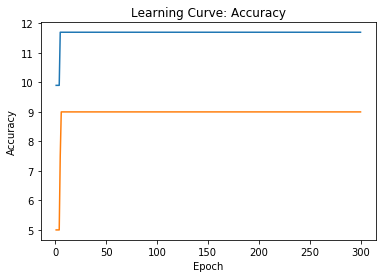

accuracy on test data : 10.28 % 


In [99]:

# Define your neural network
mnist_model_xe = NeuralNetwork(28*28,30,10,transfer_f=softmax,transfer_df=softmax_df)

# Train NN and print accuracy on validation data
mnist_model_xe.weights_init()
mnist_model_xe.train_xe(small_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model_xe.predict(test_data)/len(test_data[0])))

Training time: 23.53168749809265


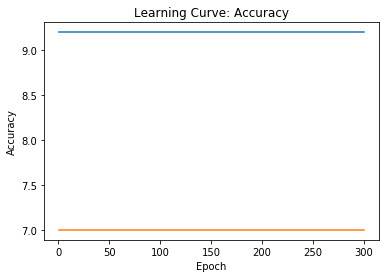

accuracy on test data : 8.92 % 
Training time: 23.377415895462036


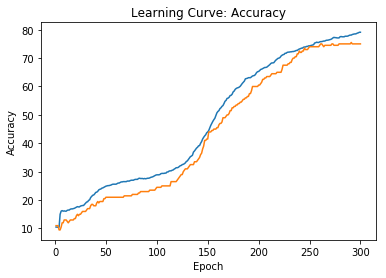

accuracy on test data : 76.40 % 
Training time: 23.94073748588562


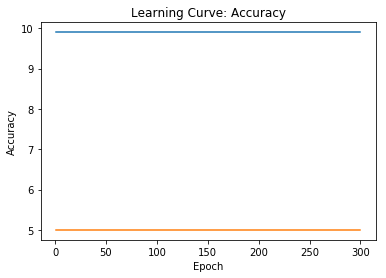

accuracy on test data : 10.32 % 


In [100]:

# Learning rate 1.
mnist_model.weights_init()
mnist_model.train(small_training_data,small_validation_data,iterations=300,learning_rate=1)
print("accuracy on test data : %2.2f %% " %(100*mnist_model.predict(test_data)/len(test_data[0])))

<b>Question 2.2.4</b>: Compare your results with the MSE loss and with the cross-entropy loss.

Answer: <br>
For the second configuration: <br>
- 30 hidden layers
- Learning rate equal to 1
we have the best accuracy result among the three experiments. We can first notice that with the cross entropy loss function and the softmax activation function, the accuracy is very sensitive to the learnng rate. We lose a lot in accuracy moving to 0.1 or 10.
Compared to the same configuration with a sigmoid activation function and a MSE, we have a better accuracy on test data (even on training data). 

<div align="center"><b>THE END!</b>